## 코드 2-1 keras에서 MNIST Dataset 적재하기

In [1]:
import keras
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### 코드 2-1-x dataset data 살펴보기

In [2]:
print(train_images.shape) 
print(train_labels)
print(len(train_labels))

(60000, 28, 28)
[5 0 4 ... 5 6 8]
60000


## 코드 2-2 신경망 구조

In [3]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

## 코드 2-3 컴파일 단계

In [4]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

## 코드 2-4 이미지 데이터 준비하기

In [5]:
train_images = train_images.reshape((60000, 28 * 28)) 
train_images = train_images.astype('float32') / 255

In [6]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

## 코드 2-5 레이블 준비하기

In [7]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [8]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2581 - accuracy: 0.9257
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1035 - accuracy: 0.9698
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0681 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0496 - accuracy: 0.9843
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0375 - accuracy: 0.9884


In [9]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc: ', test_acc)

313/313 [==============================] - 0s 545us/step - loss: 0.0698 - accuracy: 0.9787
test_acc:  0.9786999821662903


### 코드 2-5-x 신경망을 위한 데이터 표현

### Scalar(0D tensor)
- 하나의 숫자만 담고 있는 tensor

In [10]:
import numpy as np 
x = np.array(12)
print(type(x))
print(x.ndim)

<class 'numpy.ndarray'>
0


### Vector(1D tensor)
- 숫자의 배열, 하나의 축만 가지고있음

In [13]:
x = np.array([12,3,6,14,7])
print(x)
print(x.ndim)

[12  3  6 14  7]
1


### matrix(2D tensor)
- Vector의 배열, 2개의 축을 가지고 있음
- 행(row)와 열(column)으로 구성되어 있음

In [14]:
x = np.array([[5,78,2,34,0],
              [6,79,3,35,1],
              [7,80,4,36,2]])
print(x.ndim)

2


### 3D tensor
- Matrix들을 하나의 새로운 배열로 합친 형태
- 숫자가 채워진 직육면체 형태로 해석

In [16]:
x = np.array([[[5,78,2,34,0],
               [6,79,3,35,1],
               [7,80,4,36,2]],
              [[5,78,2,34,0],
               [6,79,3,35,1],
               [7,80,4,36,2]],
              [[5,78,2,34,0],
               [6,79,3,35,1],
               [7,80,4,36,2]]])
print(x.ndim)

3


### 고차원 tensor
- 3D tensor들을 하나의 배열로 합치면 4D tensor
- 딥러닝에서는 통상 0D ~ 4D까지 다룸
- 동영상을 다룰 경우에는 5D까지도 다룸

## 코드 2-6 MNIST Dataset 다섯번째 이미지 출력하기

In [26]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

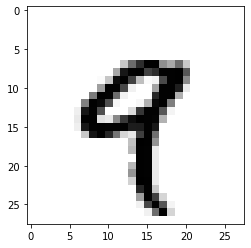

In [27]:
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### 코드 2-6-x numpy로 tensor 조작하기

In [28]:
#11번째에서 101번째까지의 image를 가져오기
my_slice = train_images[10:100]
print(my_slice.shape)

#상기 코드와 모두 동일한 내용의 코드들
# my_slice = train_images[10:100, :, :]
# my_slice = train_images[10:100, 0:28, 0:28]

(90, 28, 28)


In [31]:
#크기가 128인 batch data
batch = train_images[:128]
print(batch.shape)

#크기가 128인 다음 batch data
batch2 = train_images[128:256]
print(batch2.shape)

(128, 28, 28)
(128, 28, 28)
